In [1]:
import pandas as pd
import os
os.chdir('C:/Users/Lenovo/Desktop/data sets/')
df = pd.read_csv('credit_risk_dataset.csv')

In [2]:
df.head()

,Age,Income,Home_Ownership,Emp_Length,Purpose,Loan_Amount,Default
0,22,59000,RENT,123.0,PERSONAL,35000,1
1,21,9600,OWN,5.0,EDUCATION,1000,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,1
3,23,65500,RENT,4.0,MEDICAL,35000,1
4,24,54400,RENT,8.0,MEDICAL,35000,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32581 non-null  int64  
 1   Income          32581 non-null  int64  
 2   Home_Ownership  32581 non-null  object 
 3   Emp_Length      31686 non-null  float64
 4   Purpose         32581 non-null  object 
 5   Loan_Amount     32581 non-null  int64  
 6   Default         32581 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.7+ MB


In [4]:
df.Home_Ownership.value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: Home_Ownership, dtype: int64

In [5]:
df.Purpose.value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: Purpose, dtype: int64

In [6]:
#create dummies for categorical variables
df = pd.get_dummies(df)
df.head()

,Age,Income,Emp_Length,Loan_Amount,Default,Home_Ownership_MORTGAGE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Purpose_DEBTCONSOLIDATION,Purpose_EDUCATION,Purpose_HOMEIMPROVEMENT,Purpose_MEDICAL,Purpose_PERSONAL,Purpose_VENTURE
0,22,59000,123.0,35000,1,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1000,0,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,5500,1,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,35000,1,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,35000,1,0,0,0,1,0,0,0,1,0,0


In [7]:
#remove Home ownership other as it has very less frequency
df.drop(['Home_Ownership_OTHER'], axis = 1,inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        32581 non-null  int64  
 1   Income                     32581 non-null  int64  
 2   Emp_Length                 31686 non-null  float64
 3   Loan_Amount                32581 non-null  int64  
 4   Default                    32581 non-null  int64  
 5   Home_Ownership_MORTGAGE    32581 non-null  uint8  
 6   Home_Ownership_OWN         32581 non-null  uint8  
 7   Home_Ownership_RENT        32581 non-null  uint8  
 8   Purpose_DEBTCONSOLIDATION  32581 non-null  uint8  
 9   Purpose_EDUCATION          32581 non-null  uint8  
 10  Purpose_HOMEIMPROVEMENT    32581 non-null  uint8  
 11  Purpose_MEDICAL            32581 non-null  uint8  
 12  Purpose_PERSONAL           32581 non-null  uint8  
 13  Purpose_VENTURE            32581 non-null  uin

In [8]:
#draw corelation plot
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Income,Emp_Length,Loan_Amount,Default,Home_Ownership_MORTGAGE,Home_Ownership_OWN,Home_Ownership_RENT,Purpose_DEBTCONSOLIDATION,Purpose_EDUCATION,Purpose_HOMEIMPROVEMENT,Purpose_MEDICAL,Purpose_PERSONAL,Purpose_VENTURE
Age,1.00,0.17,0.16,0.05,-0.02,0.03,-0.00,-0.03,-0.01,-0.09,0.07,0.02,0.03,-0.01
Income,0.17,1.00,0.13,0.27,-0.14,0.20,-0.04,-0.18,0.00,-0.02,0.04,-0.04,0.01,0.00
Emp_Length,0.16,0.13,1.00,0.11,-0.08,0.22,0.03,-0.23,-0.00,-0.04,0.03,-0.00,0.01,0.01
Loan_Amount,0.05,0.27,0.11,1.00,0.11,0.13,-0.03,-0.12,0.00,-0.01,0.04,-0.02,-0.00,-0.00
Default,-0.02,-0.14,-0.08,0.11,1.00,-0.19,-0.10,0.24,0.07,-0.06,0.04,0.06,-0.02,-0.08
Home_Ownership_MORTGAGE,0.03,0.20,0.22,0.13,-0.19,1.00,-0.25,-0.85,0.03,-0.01,0.05,-0.05,0.01,-0.02
Home_Ownership_OWN,-0.00,-0.04,0.03,-0.03,-0.10,-0.25,1.00,-0.30,-0.11,0.00,0.01,-0.01,0.00,0.10
Home_Ownership_RENT,-0.03,-0.18,-0.23,-0.12,0.24,-0.85,-0.30,1.00,0.03,0.00,-0.06,0.06,-0.01,-0.03
Purpose_DEBTCONSOLIDATION,-0.01,0.00,-0.00,0.00,0.07,0.03,-0.11,0.03,1.00,-0.22,-0.15,-0.21,-0.20,-0.20
Purpose_EDUCATION,-0.09,-0.02,-0.04,-0.01,-0.06,-0.01,0.00,0.00,-0.22,1.00,-0.18,-0.24,-0.22,-0.23


In [9]:
#load the plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
print("The skweness of Age column is ",df['Age'].skew())

The skweness of Age column is  2.5813925261849846


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


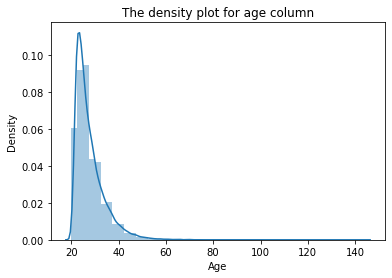

In [10]:
#density plot for Age column
sns.distplot(df['Age'])
plt.title("The density plot for age column")
plt.show()

The skewness of Age is  0.9941144158635384


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


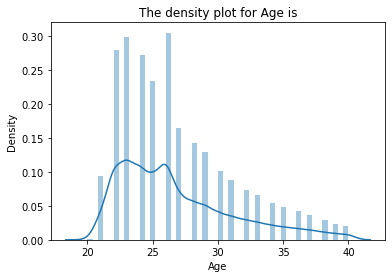

In [11]:
import numpy as np
quartiles = df['Age'].quantile([0.25,0.5,0.75])
outliers = quartiles[0.75]+1.5*(quartiles[0.75]-quartiles[0.25])
df['Age']=np.where(df['Age']>outliers,df['Age'].median(),df['Age'])
print("The skewness of Age is ",df['Age'].skew())
#density plot of Age
sns.distplot(df['Age'])
plt.title("The density plot for Age is")
plt.show()

The skewness of income is  32.865348833904434


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


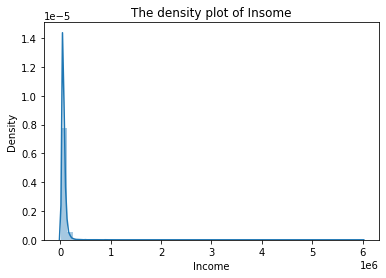

In [12]:
print("The skewness of income is ",df['Income'].skew())
sns.distplot(df['Income'])
plt.title("The density plot of Insome")
plt.show()

The skewness of income is  0.77356752013119


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


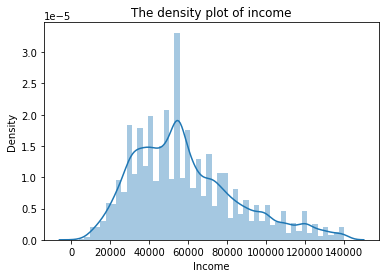

In [13]:
quantiles = df['Income'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75]+1.5*(quantiles[0.75]-quantiles[0.25])
df['Income']=np.where(df['Income']>outliers,df['Income'].median(),df['Income'])
print("The skewness of income is ",df['Income'].skew())
sns.distplot(df['Income'])
plt.title("The density plot of income")
plt.show()

The skewness of Emp_length is  2.6628784524960363


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


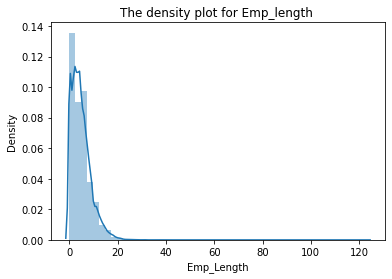

In [14]:
#Replace the missing values
df['Emp_Length']= df['Emp_Length'].fillna(df['Emp_Length'].median())
print("The skewness of Emp_length is ",df['Emp_Length'].skew())
sns.distplot(df['Emp_Length'])
plt.title("The density plot for Emp_length ")
plt.show()

The skewness of Emp_Length Column is  0.7184754974241526


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


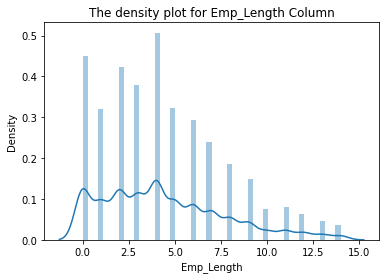

In [15]:
quantiles = df['Emp_Length'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
df['Emp_Length']=np.where(df['Emp_Length']> outliers, df['Emp_Length'].median(),df['Emp_Length'])
print("The skewness of Emp_Length Column is ",df['Emp_Length'].skew())
#density plot for Emp_Length column
sns.distplot(df['Emp_Length'])
plt.title("The density plot for Emp_Length Column")
plt.show()

The skewness of Loan Amount Column is  1.1924774277661998


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


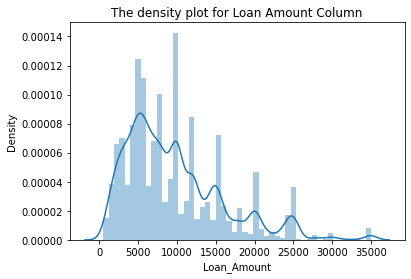

The skewness of Loan_Amount Column is  0.7234247096561005


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


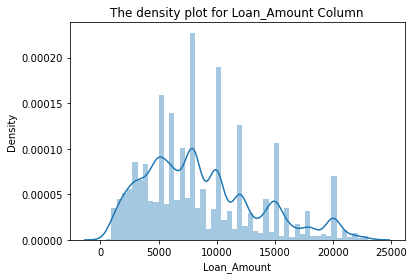

In [16]:
print("The skewness of Loan Amount Column is ",df['Loan_Amount'].skew())
#density plot for Loan Amount column
sns.distplot(df['Loan_Amount'])
plt.title("The density plot for Loan Amount Column")
plt.show()
#Agin it is highly skewed so replacing the noise
quantiles = df['Loan_Amount'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
df['Loan_Amount']=np.where(df['Loan_Amount']> outliers, df['Loan_Amount'].median(),df['Loan_Amount'])
print("The skewness of Loan_Amount Column is ",df['Loan_Amount'].skew())
#density plot for Loan_Amount column
sns.distplot(df['Loan_Amount'])
plt.title("The density plot for Loan_Amount Column")
plt.show()

In [17]:
# divide the dataset by train and test
from sklearn.model_selection import train_test_split
#training data 70%, and testing data 30%. lets randomize the data before splitting
#Remember the value for random_state = 123 is just to repeat the same training and testing data after splitting
#First divide the dataset by independent variables (X), and 1 dependent variable(y)
X = df.drop(['Default'], axis = 1)
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X,
                                    y, train_size=0.7 , random_state=100)
print("the size of X_train data ",X_train.shape)
print("the size of X_test data ", X_test.shape)

the size of X_train data  (22806, 13)
the size of X_test data  (9775, 13)


In [18]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Object First
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
lr.coef_

array([[ 9.31055592e-10, -3.85787188e-05, -3.17494679e-08,
         8.92067070e-05, -1.06238485e-08, -7.32062652e-09,
         1.81158696e-08,  5.53033912e-09, -4.21201523e-09,
         3.42677556e-09,  3.02291095e-09, -1.35353078e-09,
        -6.09444459e-09]])

In [20]:
df_coef = pd.DataFrame(columns = ['ColumnName', 'Coefficient_value'])
df_coef['ColumnName'] = X.columns
df_coef['Coefficient_value'] = lr.coef_[0]
df_coef

,ColumnName,Coefficient_value
0,Age,9.310556e-10
1,Income,-3.857872e-05
2,Emp_Length,-3.174947e-08
3,Loan_Amount,8.920671e-05
4,Home_Ownership_MORTGAGE,-1.062385e-08
5,Home_Ownership_OWN,-7.320627e-09
6,Home_Ownership_RENT,1.811587e-08
7,Purpose_DEBTCONSOLIDATION,5.530339e-09
8,Purpose_EDUCATION,-4.212015e-09
9,Purpose_HOMEIMPROVEMENT,3.426776e-09


In [21]:
lr.intercept_

array([3.20035034e-10])

In [22]:
ypred=lr.predict(X_test)
print(ypred)

[0 0 0 ... 0 0 0]


In [23]:
df.Default.value_counts()

0    25473
1     7108
Name: Default, dtype: int64

Text(0.5, 15.0, 'Predictions')

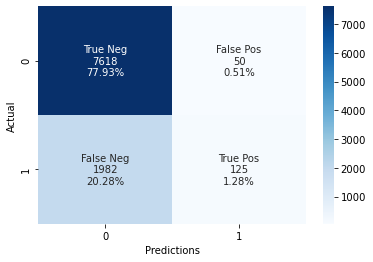

In [24]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, ypred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predictions")

In [25]:
#find the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ypred)
print(accuracy)

0.7921227621483375


In [26]:
y_test.value_counts()

0    7668
1    2107
Name: Default, dtype: int64

In [27]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, ypred)
print("the value of recall is: ",recall)

from sklearn.metrics import precision_score
precision = precision_score(y_test, ypred)
print("the precision value is: ",precision)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, ypred)
print("the f1 value is: ",f1)

the value of recall is:  0.05932605600379687
the precision value is:  0.7142857142857143
the f1 value is:  0.10955302366345311


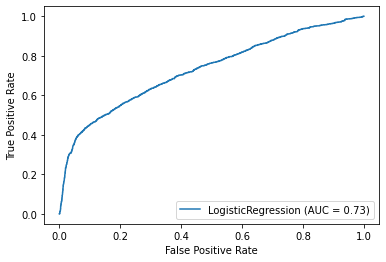

In [28]:
from sklearn import metrics
metrics.plot_roc_curve(lr, X_test, y_test)  
plt.show()  